In [1]:
from sklearn import datasets
import numpy as np

## scikit-learn の活用例

In [2]:
# iris データの読み込み
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print(f"Class labels: {np.unique(y)}")

Class labels: [0 1 2]


In [3]:
# 訓練データとテストデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=1, stratify=y
)

print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
# 訓練データを用いた標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(X_train_std.mean(),X_train_std.std())
print(X_test_std.mean(),X_test_std.std())

1.0150610510858574e-16 0.9999999999999999
-0.024516396323407026 0.9616054315705168


## sklearn のパーセプトロンクラスによる学習と予測

In [5]:
# sklearn のパーセプトロンクラスによる学習
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print(f"Misclassified examples: {(y_test != y_pred).sum()}")

Misclassified examples: 1


In [7]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Accuracy: {ppn.score(X_test_std, y_test):.3f}")

Accuracy: 0.978
Accuracy: 0.978


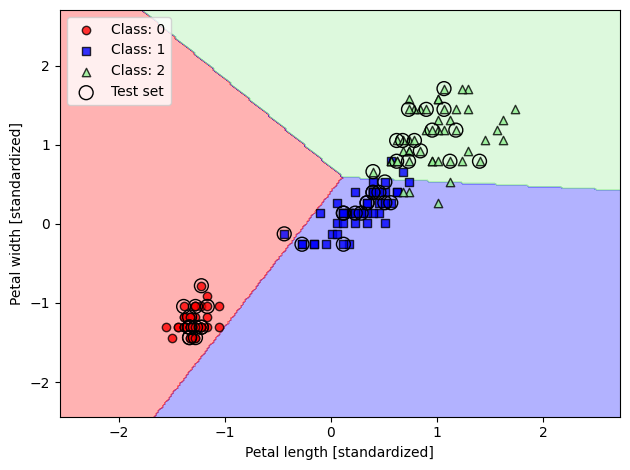

In [8]:
# 訓練データとテストデータの可視化
from study_pytorch.plot_util import plot_decision_regions
import matplotlib.pyplot as plt
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx = range(105,150))
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

* 線形分離不可能なデータセットなので、誤分類が含まれる